# TP : MMGD - Projet 
## Vue d'ensemble du projet
> Le but de ce projet est de vous faire explorer plusieurs techniques fondées sur la factorisation de matrice et leurs applications. Vous aurez une grande liberté dans le déroulement du TP et le rendu, afin d’encourager votre créativité et votre analyse. Les informations listées ici sont données à titre indicatif, dans le but de vous guider vers des pistes intéressantes. Vous êtes volontairement laissés libres de votre travail, sans objectif de performance. Vous n’avez pas d’obligation de résultat, mais une obligation de moyens.

## Objectifs : 
* Vous appliquerez au moins un algorithme de factorisation de matrice à un des jeux de données, vous expliquerez ses fondements mathématiques ainsi qu’algorithmiques et présenterez vos résultats.
* J’évaluerai principalement votre capacité d’analyse, de synthèse et d’esprit critique : il est essentiel d’expliquer clairement ce que vous faites, et pour quoi. Un seul algorithme testé, mais expliqué clairement vaut mieux que 10 méthodes testées et laissées sans explication.
* A la fin de ce document, vous trouverez des références. N’hésitez pas à vous en servir.
* N’hésitez pas non plus à chercher d’autres références (sans oublier bien sûr de les citer).
* Les exemples de codes sont donnés en Python. Si vous êtes plus à l’aise avec un autre langage, n’hésitez pas à l’utiliser.
* Gardez à l’esprit qu’il faut toujours être critique avec votre démarche : justifiez vos choix techniques tels que les algorithmes ou les normes.

### Algorithme de factorisation de matrice 
> Nous avons vu en cours que les algorithmes de factorisation de matrice peuvent être utilisés pour la classification ou pour la complétion de matrices. Comment pouvez vous appliquer ces techniques aux données fournies pour obtenir des résultats intéressants ?

In [2]:
### Introducing dataset 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline
# Loading all datasets
NYT = pd.read_csv('NYT_words_matrix.csv')
#NYT_words = pd.read_csv('NYT_words.dat')
anime_names = pd.read_csv('anime_names.csv')
anime_users = pd.read_csv('anime_ratings_by_user.csv')

In [3]:
# After loading packages & data : have a quick insight of the dataset
anime_names.head()
#anime_users.head()
anime_names.columns =['anime_id','anime_name'] # Renaming headers to merge
anime_names.head()


,anime_id,anime_name
0,32281,Kimi no Na wa.
1,5114,Fullmetal Alchemist: Brotherhood
2,28977,Gintama°
3,9253,SteinsGate
4,9969,Gintama039


In [4]:
anime_users.head()

,user_id,anime_id,rating
0,3,20,8
1,3,154,6
2,3,199,10
3,3,225,9
4,3,341,6


#### Implement a quick & easy to understand algorithm 
> Im going to first work on the anime datasets using the following link :https://www.kaggle.com/tanetboss/user-clustering-for-anime-recommendation as a source

In [5]:
# We should at first merge both anime_names & anime_users
# Merge on V1 & anime_ide
anime = pd.merge(anime_names,anime_users,on='anime_id')
anime.head()
# Data is merged and name

,anime_id,anime_name,user_id,rating
0,5114,Fullmetal Alchemist: Brotherhood,3,10
1,5114,Fullmetal Alchemist: Brotherhood,11,8
2,5114,Fullmetal Alchemist: Brotherhood,21,9
3,5114,Fullmetal Alchemist: Brotherhood,30,10
4,5114,Fullmetal Alchemist: Brotherhood,38,10


In [6]:
# Create a crosstable 
# Swow detail of anime which each user like 
user_anime = pd.crosstab(anime['anime_name'],anime['user_id'])
user_anime.head()

user_id,3,5,7,11,14,17,21,23,24,27,...,73499,73500,73501,73502,73503,73504,73507,73510,73513,73515
anime_name,,,,,,,,,,,,,,,,,,,,,
.hack//G.U. Returner,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
.hack//G.U. Trilogy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
.hack//G.U. Trilogy: Parody Mode,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
.hack//Gift,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
.hack//Intermezzo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Implementing a quick PCA just to get back on track w/ python

In [7]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=3)
pca.fit(user_anime)
pca_samples = pca.transform(user_anime)

In [ ]:
ps = pd.DataFrame(pca_samples)
ps.head()

In [ ]:
tocluster = pd.DataFrame(ps[[0,1,2]])

In [30]:
from mpl_toolkits.mplot3d import Axes3D

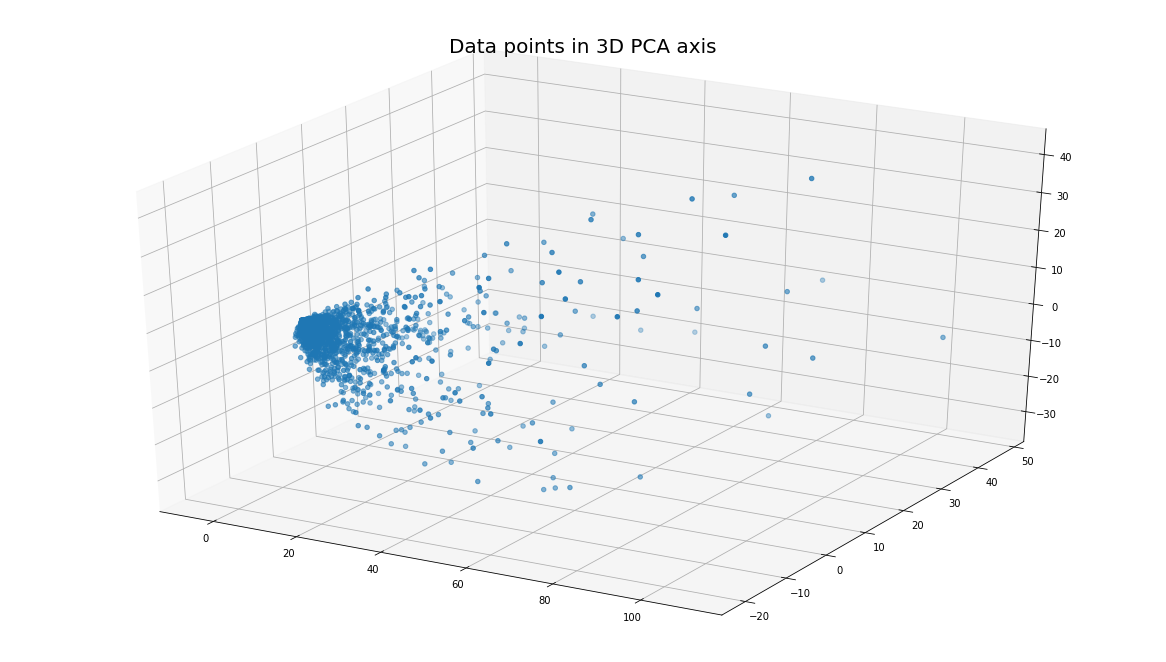

In [31]:
plt.rcParams['figure.figsize'] = (16, 9)


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1])

plt.title('Data points in 3D PCA axis', fontsize=20)
plt.show()

#### As we can see in this PCA the data seems difficul

## KMeans could be seen as a first method to classify movie 

### Selecting number of k 
> Clustering

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
scores =[]
inertia_list = np.empty(8)

for i in range (2,8):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(tocluster)
    inertia_list[i] = kmeans.inertia_
    scores.append(silhouette_score(tocluster,kmeans.labels_))

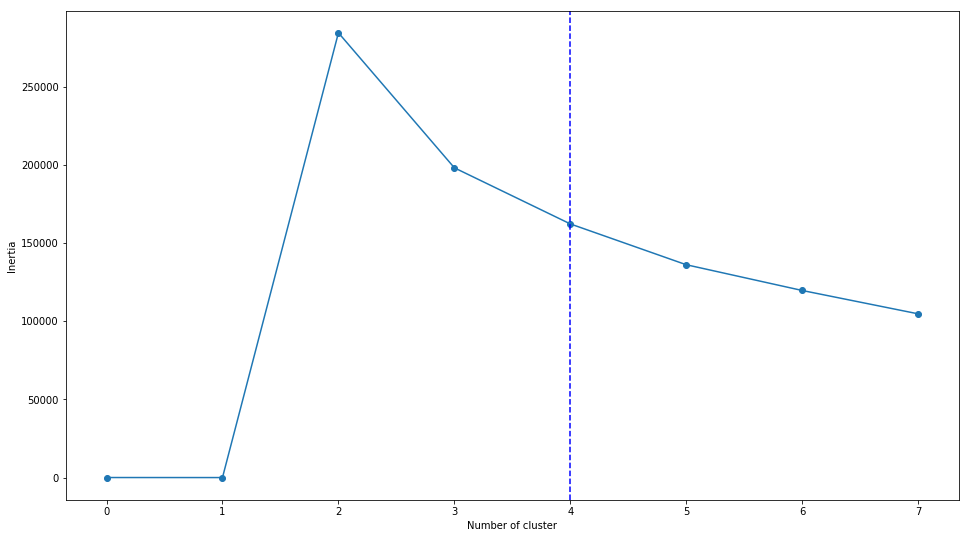

In [35]:
plt.plot(range(0,8), inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.axvline(x=4,color="blue", linestyle ='--')
plt.ylabel('Inertia')
plt.show()

## Building the Recommender System

-------------------------------

In [8]:
### Root file

!ls -l

print('\n')

!pwd

total 178568
-rwxr-xr-x@ 1 pel_btc_coding  staff  50884728 May 13 08:07 NYT_words_matrix.csv
-rw-r--r--  1 pel_btc_coding  staff    263164 Jun  3 00:23 TP - MMGD - ER.ipynb
-rwxr-xr-x@ 1 pel_btc_coding  staff    352494 May 13 08:06 anime_names.csv
-rwxr-xr-x@ 1 pel_btc_coding  staff  39914789 May 13 08:07 anime_ratings_by_user.csv


/Users/pel_btc_coding/code/PelDoingCode/bigdata/movie-recommender


In [9]:
### Some basic librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
### Read files

names = pd.read_csv("anime_names.csv")
ratings = pd.read_csv("anime_ratings_by_user.csv")
words = pd.read_csv('NYT_words_matrix.csv')
#NYT_words = pd.read_csv('NYT_words.dat')

In [11]:
ratings.head()

,user_id,anime_id,rating
0,3,20,8
1,3,154,6
2,3,199,10
3,3,225,9
4,3,341,6


In [12]:
names.head()

,V1,V2
0,32281,Kimi no Na wa.
1,5114,Fullmetal Alchemist: Brotherhood
2,28977,Gintama°
3,9253,SteinsGate
4,9969,Gintama039


### Feature engineering

In [13]:
names.columns = ['anime_id','anime_name'] # Renaming headers to merge
names.head()

,anime_id,anime_name
0,32281,Kimi no Na wa.
1,5114,Fullmetal Alchemist: Brotherhood
2,28977,Gintama°
3,9253,SteinsGate
4,9969,Gintama039


### Merge two datasets

In [14]:
anime = pd.merge(names,ratings,on='anime_id')
anime.head()

,anime_id,anime_name,user_id,rating
0,5114,Fullmetal Alchemist: Brotherhood,3,10
1,5114,Fullmetal Alchemist: Brotherhood,11,8
2,5114,Fullmetal Alchemist: Brotherhood,21,9
3,5114,Fullmetal Alchemist: Brotherhood,30,10
4,5114,Fullmetal Alchemist: Brotherhood,38,10


In [15]:
anime.tail()

,anime_id,anime_name,user_id,rating
3141788,2592,Kimera,66840,9
3141789,2592,Kimera,70585,8
3141790,2592,Kimera,71021,5
3141791,2592,Kimera,71529,5
3141792,2592,Kimera,73389,7


### Cleaning data a bit

In [43]:
#anime['anime_id'].value_counts()

### On voit une repartition très déséquilibrée mais cela n'est pas dérangeant pour le type de problème (pas besoin de faire de sample)

anime.isnull().sum()

anime.drop_duplicates(inplace = True)

In [44]:
### The dataset is quiet important which is nice and already clean 

anime.fillna(0)
print('data set clean and sound')

data set clean and sound


In [18]:
#### Data is already super clean and well made

### Some data insights

print(len(anime))

print(anime.shape)

3141793
(3141793, 4)


In [19]:
anime[anime['user_id'] == 3].rating.mean()

7.690476190476191

In [20]:
anime[anime['user_id'] == 70585].rating.mean()

9.152838427947598

In [21]:
### Calculate mean rating per user

mean_user = anime.groupby(['user_id']).mean().reset_index()
mean_user['mean_rating'] = mean_user['rating']

mean_user.drop(['anime_id','rating'],axis=1, inplace=True)

mean_user.head(15)

,user_id,mean_rating
0,3,7.690476
1,5,5.038251
2,7,7.965909
3,11,7.139241
4,14,7.452381
5,17,7.370079
6,21,7.903614
7,23,9.651163
8,24,8.346154
9,27,8.518519


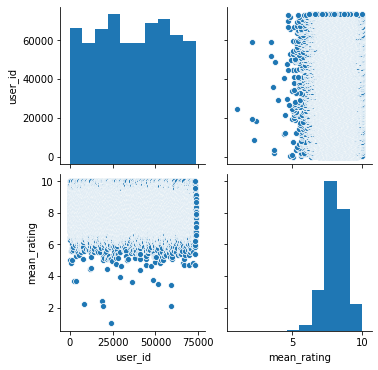

In [22]:
import seaborn as sns
sns.pairplot(mean_user)

### This gives us a distribution of ratings, we almost have a normal distribution centered between 5 and 10 

## Correlation matrix : we should see extremely low correlation, it's a way to check weither the dataset is faked

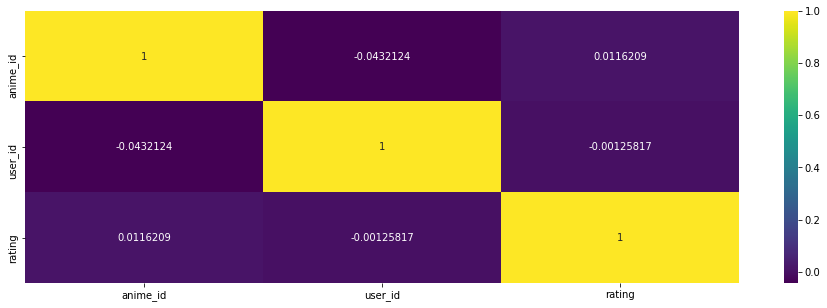

In [23]:
plt.figure(figsize = (16,5))
df_check=anime.corr()
sns.heatmap(df_check, annot=True, fmt="g", cmap='viridis')
plt.show()

### Correlations under 0.01 this is a good sign

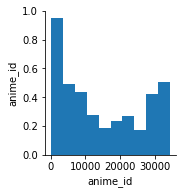

In [24]:
### Test a seaborn plot : aim see the repartition of voting and 

import matplotlib

# anime.plot(kind="bar")

sns.pairplot(names)

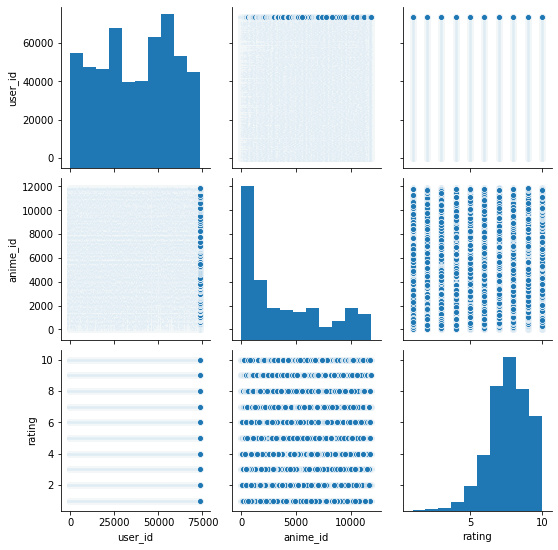

In [25]:
#### Some people vote more than other, which can create a bias 

sns.pairplot(ratings)

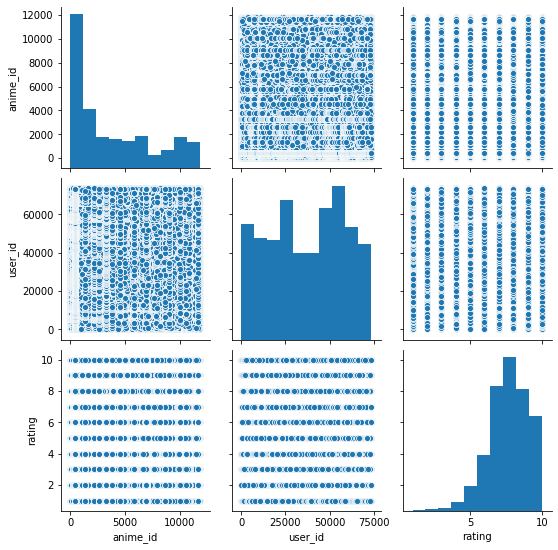

In [26]:
#### We can see that ratings are pretty high, almost looking like a gaussian 

sns.pairplot(anime)

In [27]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3141793 entries, 0 to 3141792
Data columns (total 4 columns):
anime_id      int64
anime_name    object
user_id       int64
rating        int64
dtypes: int64(3), object(1)
memory usage: 119.8+ MB


In [28]:
anime.describe()

,anime_id,user_id,rating
count,3.141793e+06,3.141793e+06,3.141793e+06
mean,3.812213e+03,3.719307e+04,7.881623e+00
std,3.695412e+03,2.088048e+04,1.545990e+00
min,1.000000e+00,3.000000e+00,1.000000e+00
25%,5.440000e+02,1.964300e+04,7.000000e+00
50%,2.251000e+03,3.873200e+04,8.000000e+00
75%,6.574000e+03,5.506800e+04,9.000000e+00
max,1.183700e+04,7.351500e+04,1.000000e+01


### Strat by building a model for ratings : 

In [30]:
from sklearn.model_selection import train_test_split

#### Classic 80/20 split 

train, test = train_test_split(anime, test_size=0.2)

In [31]:
### Importing all needed librairies 

import keras
from IPython.display import SVG
from keras.optimizers import Adam
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


In [32]:
anime.tail()

,anime_id,anime_name,user_id,rating
3141788,2592,Kimera,66840,9
3141789,2592,Kimera,70585,8
3141790,2592,Kimera,71021,5
3141791,2592,Kimera,71529,5
3141792,2592,Kimera,73389,7


In [33]:
Matrix = pd.pivot_table(anime,values='rating', index=['user_id','anime_id'], aggfunc=np.mean).unstack()

Matrix.ix[0:20, 0:20]

#### On a une matrice bien creuse, logique les utilisateurs ont noté que les films visionné 

Matrix = Matrix.fillna(0)

#### Replacing NaN by 0 to enable matrix product and so on 

Matrix.head()

/Users/pel_btc_coding/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


rating                                                        ...  \
anime_id  1     5     6     7     8     15    16    17    18    19     ...   
user_id                                                                ...   
3           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
5           0.0   0.0   8.0   0.0   0.0   6.0   0.0   6.0   6.0   0.0  ...   
7           0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
11          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
14          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

                                                                      
anime_id 11783 11785 11787 11789 11793 11795 11799 11809 11813 11837  
user_id                                                               
3          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
5          0.0   3.0   0.0   0.0   0.0   0.0   0.0   0.0   5.0   0.0  
7          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
11         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
14         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 4365 columns]

In [34]:
P = Matrix.as_matrix()

#### Classic reshaping to fit skleanr format 

user_ratings_mean = np.mean(P, axis = 1)
P_diag = P - user_ratings_mean.reshape(-1, 1)

### Using build in SVD function from Linalg module

from scipy.sparse.linalg import svds

V, D, Vt = svds(P_diag, k = 50)
D.shape

D=np.diag(D)

all_user_predicted_ratings = np.dot(np.dot(V, D), Vt) + user_ratings_mean.reshape(-1, 1)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = Matrix.columns)

ratings.head()

/Users/pel_btc_coding/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


,user_id,anime_id,rating
0,3,20,8
1,3,154,6
2,3,199,10
3,3,225,9
4,3,341,6


In [35]:
### Recommender itself by just sorting and ranking by best rating of movies the user didn't already saw

def recommend_movies(predictions_df, user_id, movies_df, original_ratings_df, num_recommendations):
    
    # sort the user's 
    user_row_number = user_id - 1
    # Getting all user input 
    sorted_user_predictions = predictions_df.iloc[user_row_number].sort_values(ascending=False)
    user_data = original_ratings_df[original_ratings_df.user_id == (user_id)]
    user_full = (user_data.merge(movies_df, how = 'left', left_on = 'anime_id', right_on = 'anime_id').sort_values(['rating'], ascending=False))
    
    print('User {0} has already rated {1} movies.'.format(user_id, user_full.shape[0]))
    print("\n")
    print('Recommending the highest {0} predicted ratings movies not already rated.'.format(num_recommendations))
    print("\n")
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet
    recommendations = (movies_df[~movies_df['anime_id'].isin(user_full['anime_id'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',left_on = 'anime_id',right_on = 'anime_id').
                       rename(columns = {user_row_number: 'Predictions'}).sort_values('Predictions', ascending = False).iloc[:num_recommendations, :-1])

    return(user_full, recommendations)

### Giving user id and number of movies to recommend 

In [37]:
user_id = 3
number_recommandation = 10

In [38]:
### Or using inputs : 

print('Enter a user ID:')
user_id = int(input())

Enter a user ID:
3


In [39]:
print('Enter a number of movie you want to recommend:')
number_recommandation = int(input())

Enter a number of movie you want to recommend:
5


In [40]:
### Simulating the prediction

already, predictions = recommend_movies(preds_df, user_id, names, ratings, number_recommandation)
#already

User 3 has already rated 42 movies.


Recommending the highest 5 predicted ratings movies not already rated.




In [41]:
### Actual prediction 

print(f"For user {user_id}, and for {number_recommandation} recommandations, we have the following prediction")

For user 3, and for 5 recommandations, we have the following prediction


### We would recommend the following list of movies 

In [42]:
predictions = predictions.drop(columns='level_0')
predictions.head()

,anime_id,anime_name
199,30,Neon Genesis Evangelion
121,32,Neon Genesis Evangelion: The End of Evangelion
9,4181,Clannad: After Story
17,1575,Code Geass: Hangyaku no Lelouch
211,2167,Clannad


### End of Jupyter